# Матрицы и векторы

In [1]:
!pip install numpy matplotlib --quiet


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Вектор
Вектор — это одномерный массив чисел. Рассмотрим пример вектора.

In [3]:
# Создаем вектор
v = np.array([1, 2, 3])

# Выводим вектор
print("Вектор v:", v)

# Размерность вектора
print("Размерность вектора v:", v.shape)

# Доступ к элементам вектора
print("Первый элемент вектора v:", v[0])

Вектор v: [1 2 3]
Размерность вектора v: (3,)
Первый элемент вектора v: 1


Основные операции с векторами включают сложение, вычитание, умножение на скаляр и скалярное произведение.

In [4]:
# Создаем два вектора
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# Сложение векторов
v_sum = v1 + v2
print("Сложение векторов v1 и v2:", v_sum)

# Вычитание векторов
v_diff = v1 - v2
print("Вычитание векторов v1 и v2:", v_diff)

# Умножение вектора на скаляр
scalar = 2
v_scalar_mult = scalar * v1
print("Умножение вектора v1 на скаляр:", v_scalar_mult)

# Скалярное произведение векторов
v_dot = np.dot(v1, v2)
print("Скалярное произведение векторов v1 и v2:", v_dot)

Сложение векторов v1 и v2: [5 7 9]
Вычитание векторов v1 и v2: [-3 -3 -3]
Умножение вектора v1 на скаляр: [2 4 6]
Скалярное произведение векторов v1 и v2: 32


Чтобы лучше понять смысл скалярного произведения, я люблю вспоминать тень объекта, по сути это скалярное произведение нормали поверхности и вектора источника света. Если эти вектора смотрят друг на друга - значит скалярное произведеление максимально, иначе минимально.

In [5]:
# Определяем размер и координатную сетку поверхности
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Определяем вектор источника света
light_vector = np.array([1, 1, -1])  # направление света
light_normalized = light_vector / np.linalg.norm(light_vector)

In [6]:
# Вычисление градиента поверхности
dzdx, dzdy = np.gradient(z, x[0, :], y[:, 0]) # Указываем шаг сетки по осям x и y

# Нормаль поверхности в каждой точке
normals = np.dstack((-dzdx, -dzdy, np.ones_like(z)))

# Нормализация нормалей
norm_magnitudes = np.sqrt(np.sum(normals**2, axis=2))
normals_normalized = normals / np.expand_dims(norm_magnitudes, axis=2)

In [7]:
# Скалярное произведение нормалей и вектора света
dot_products = np.einsum('ijk,k->ij', normals_normalized, light_normalized)

# Уровень затемнения (нормируем от 0 до 1)
shading = (dot_products - dot_products.min()) / (dot_products.max() - dot_products.min())

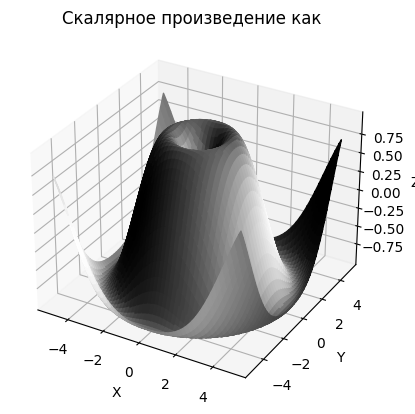

In [8]:
# Создание фигуры и 3D осей
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# График поверхности с уровнем затемнения
ax.plot_surface(x, y, z, facecolors=plt.cm.gray(shading), shade=False)

# Настройки графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Скалярное произведение как ')

plt.show()

### Матрицы
Матрица — это двумерный массив чисел.

In [9]:
# Создаем матрицу
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Выводим матрицу
print("Матрица A:\n", A)

# Размерность матрицы
print("Размерность матрицы A:", A.shape)

# Доступ к элементам матрицы
print("Первый элемент матрицы A:", A[0, 0])
print("Элемент в строке 2 и столбце 3 матрицы A:", A[1, 2])

Матрица A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Размерность матрицы A: (3, 3)
Первый элемент матрицы A: 1
Элемент в строке 2 и столбце 3 матрицы A: 6


Основные операции с матрицами включают сложение, вычитание, умножение на скаляр и матричное умножение.

In [10]:
# Создаем две матрицы
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])

# Сложение матриц
A_sum_B = A + B
print("Сложение матриц A и B:\n", A_sum_B)

# Вычитание матриц
A_diff_B = A - B
print("Вычитание матриц A и B:\n", A_diff_B)

# Умножение матрицы на скаляр
scalar = 2
A_scalar_mult = scalar * A
print("Умножение матрицы A на скаляр:\n", A_scalar_mult)

# Матричное умножение
A_dot_B = np.dot(A, B)
print("Матричное умножение A и B:\n", A_dot_B)

Сложение матриц A и B:
 [[10 10 10]
 [10 10 10]
 [10 10 10]]
Вычитание матриц A и B:
 [[-8 -6 -4]
 [-2  0  2]
 [ 4  6  8]]
Умножение матрицы A на скаляр:
 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
Матричное умножение A и B:
 [[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]


Транспонирование матрицы меняет строки и столбцы местами.

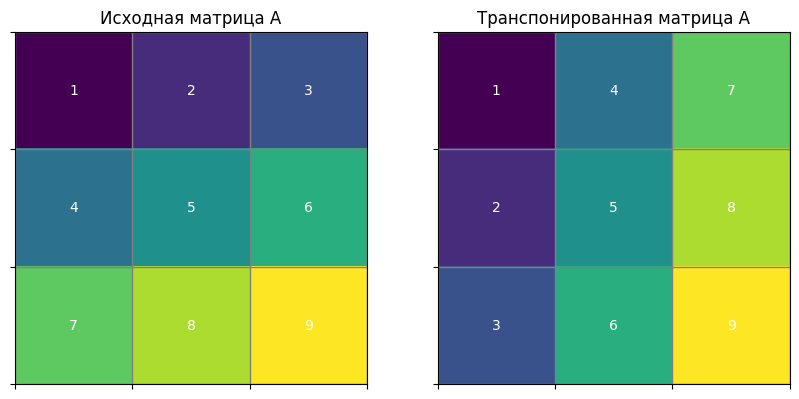

In [11]:
# Транспонируем матрицу
A_transposed = np.transpose(A)

# Визуализация исходной и транспонированной матриц
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Исходная матрица
axes[0].imshow(A, cmap='viridis', interpolation='none')
axes[0].set_title("Исходная матрица A")
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        axes[0].text(j, i, str(A[i, j]), va='center', ha='center', color='white')

# Транспонированная матрица
axes[1].imshow(A_transposed, cmap='viridis', interpolation='none')
axes[1].set_title("Транспонированная матрица A")
for i in range(A_transposed.shape[0]):
    for j in range(A_transposed.shape[1]):
        axes[1].text(j, i, str(A_transposed[i, j]), va='center', ha='center', color='white')

# Настройки графика
for ax in axes:
    ax.set_xticks(np.arange(-0.5, 3, 1))
    ax.set_yticks(np.arange(-0.5, 3, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(color='gray', linestyle='-', linewidth=1)

plt.show()